In [1]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import nltk 
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
tweets=pd.read_csv('Elon_musk.csv')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
tweets=tweets.rename({'Unnamed: 0':'index'},axis=1)
tweets

,index,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
tweets.tail()

,index,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [10]:
#counting the no of words and store it in word_count
tweets['word_count'] = tweets['Text'].apply(lambda x: len(str(x).split(" ")))
tweets[['Text', 'word_count']]

,Text,word_count
0,@kunalb11 I’m an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",23
1995,@PPathole Make sure to read ur terms &amp; con...,12
1996,@TeslaGong @PPathole Samwise Gamgee,4
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,7


In [11]:
# counting no of cherecter(including space)and store it in char_count
tweets['char_count'] = tweets['Text'].str.len() ## this also includes spaces
tweets[['Text', 'char_count']]

,Text,char_count
0,@kunalb11 I’m an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",144
1995,@PPathole Make sure to read ur terms &amp; con...,77
1996,@TeslaGong @PPathole Samwise Gamgee,35
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,59


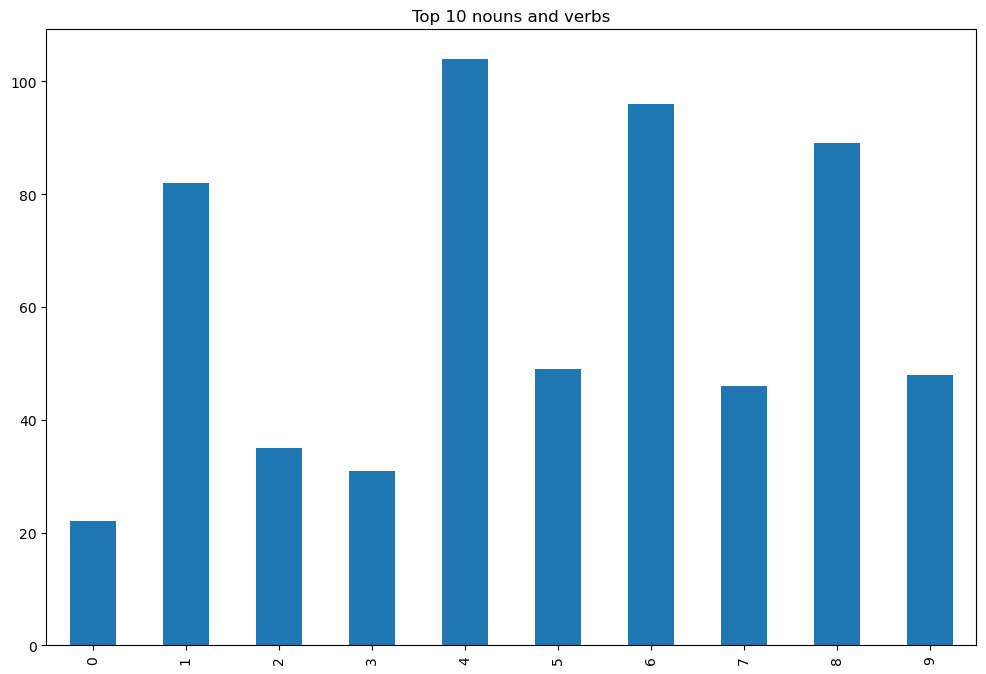

In [12]:
tweets['char_count'][0:10].plot.bar(x='tweets',figsize=(12,8),title='Top 10 nouns and verbs');

In [13]:
#average length of the word
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

In [14]:
#applying defined function on tweets data
tweets['avg_word'] = tweets['Text'].apply(lambda x: avg_word(x))
tweets[['Text', 'avg_word']]

,Text,avg_word
0,@kunalb11 I’m an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",5.304348
1995,@PPathole Make sure to read ur terms &amp; con...,5.500000
1996,@TeslaGong @PPathole Samwise Gamgee,8.000000
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,7.571429


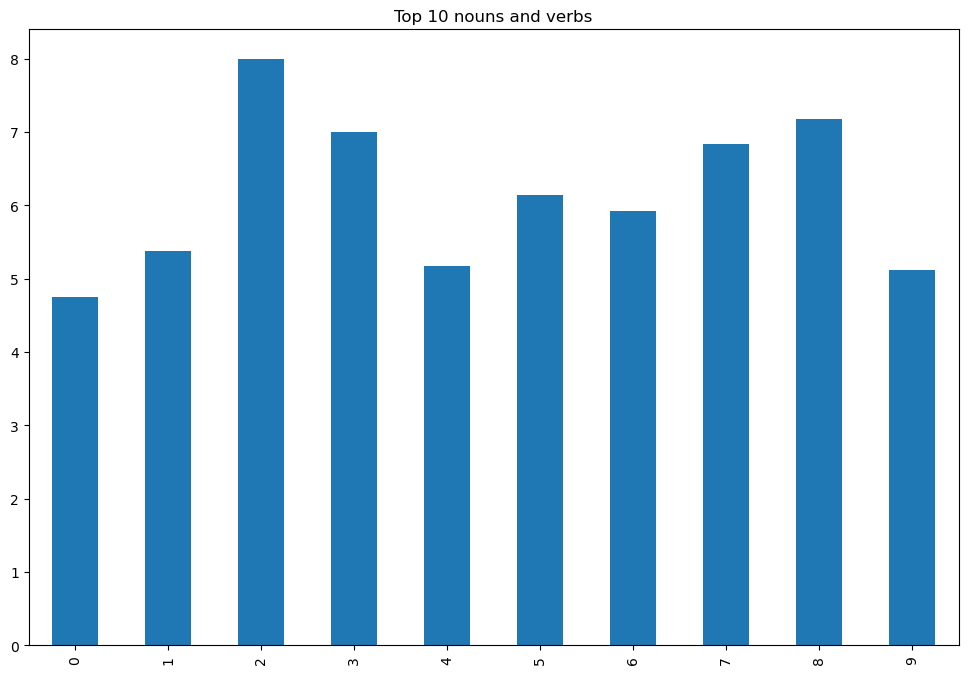

In [15]:
tweets['avg_word'][0:10].plot.bar(x='tweets',figsize=(12,8),title='Top 10 nouns and verbs');

In [16]:
#applying stopwords.words function on tweets data and store it on stopwords
stopword = stopwords.words('english')

tweets['stopwords'] = tweets['Text'].apply(lambda x: len([x for x in x.split() if x in stopword]))
tweets[['Text', 'stopwords']]

,Text,stopwords
0,@kunalb11 I’m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",10
1995,@PPathole Make sure to read ur terms &amp; con...,2
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,2


In [17]:
#count of upper case words
tweets['upper'] = tweets['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tweets[['Text','upper']].head()

,Text,upper
0,@kunalb11 I’m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [18]:
# count of words with special charector
tweets['hastags']= tweets['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
tweets[['Text', 'hastags']]

,Text,hastags
0,@kunalb11 I’m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",1
1995,@PPathole Make sure to read ur terms &amp; con...,1
1996,@TeslaGong @PPathole Samwise Gamgee,2
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,1


In [19]:
# count of numerics
tweets['numerics'] = tweets['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tweets[['Text','numerics']]

,Text,numerics
0,@kunalb11 I’m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",0
1995,@PPathole Make sure to read ur terms &amp; con...,0
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0


# Preprocessing 

In [20]:
# preprocessing on lower case words
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweets['Text'].head() 

0                               @kunalb11 i’m an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [21]:
# removing punctuation marks
tweets['Text'] = tweets['Text'].str.replace('[^\w\s]','')
tweets['Text'].head()

C:\Users\Rohit\AppData\Local\Temp\ipykernel_14096\4254757527.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Text'] = tweets['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [22]:
#removing stopwords
stopword = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ". join(x for x in x.split() if x not in stopword ))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [23]:
# count of the frequent words
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [24]:
# removing the frequent words
freq = list(freq.index)
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [25]:
# count of the rare words
#(-10) bcz words which are not that frequent= rare
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[-20:]
freq

john_beans            1
accuracy              1
sarscov2              1
httpstcovbiu7ds4uq    1
identify              1
httpstcom8vj2gaofs    1
24                    1
sniffles              1
cough                 1
fever                 1
nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [26]:
# removing of rare words
freq = list(freq.index)
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
tweets['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [27]:
#spelling correction 
tweets['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [28]:
#tokenization 
import nltk
TextBlob(tweets['Text'][1]).words


WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [29]:
#stemming
from nltk.stem import PorterStemmer
st= PorterStemmer()
tweets['Text'][:5].apply(lambda x: " ".join ([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

In [30]:
#lammatization
from textblob import Word
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join ([Word(word).lemmatize() for word in x.split()]))
tweets['Text'].head()


**********************************************************************
  Resource wordnet not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('wordnet')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/wordnet

  Searched in:
    - 'C:\\Users\\Rohit/nltk_data'
    - 'C:\\Users\\Rohit\\anaconda3\\nltk_data'
    - 'C:\\Users\\Rohit\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Rohit\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Rohit\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


# advance text processing 

In [ ]:
# n Grams
TextBlob(tweets['Text'][0]).ngrams(2)

In [ ]:
# term friquency
#ratio of count of word to length of sentence

term_freq = (tweets['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
term_freq.columns = ['words','tf']
term_freq

In [ ]:
#inverse document frequency
for i,word in enumerate(term_freq['words']):
    term_freq.loc[i, 'idf']= np.log(tweets.shape[0]/(len(tweets[tweets['Text'].str.contains(word)])))
    
term_freq

The inverse document frequency is a measure of whether a 
term iscommon or rare in a given document corpus.
It is obtained by dividing the total number of documents 
by the number of documents containing the term in the corpus.

In [ ]:
#term frequency- inverse document
term_freq['tf-idf']= term_freq['tf'] * term_freq['idf']
term_freq

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(tweets['Text'])
vect

In [ ]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
tweets_bag_of_words = bag_of_words.fit_transform(tweets['Text'])
tweets_bag_of_words

In [ ]:
#sentiment analysis
tweets['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

In [ ]:
tweets['sentiment'] = tweets['Text'].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Text', 'sentiment']]

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(tweets['sentiment'])

In [31]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 160.3 kB/s eta 0:00:00
